#  UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

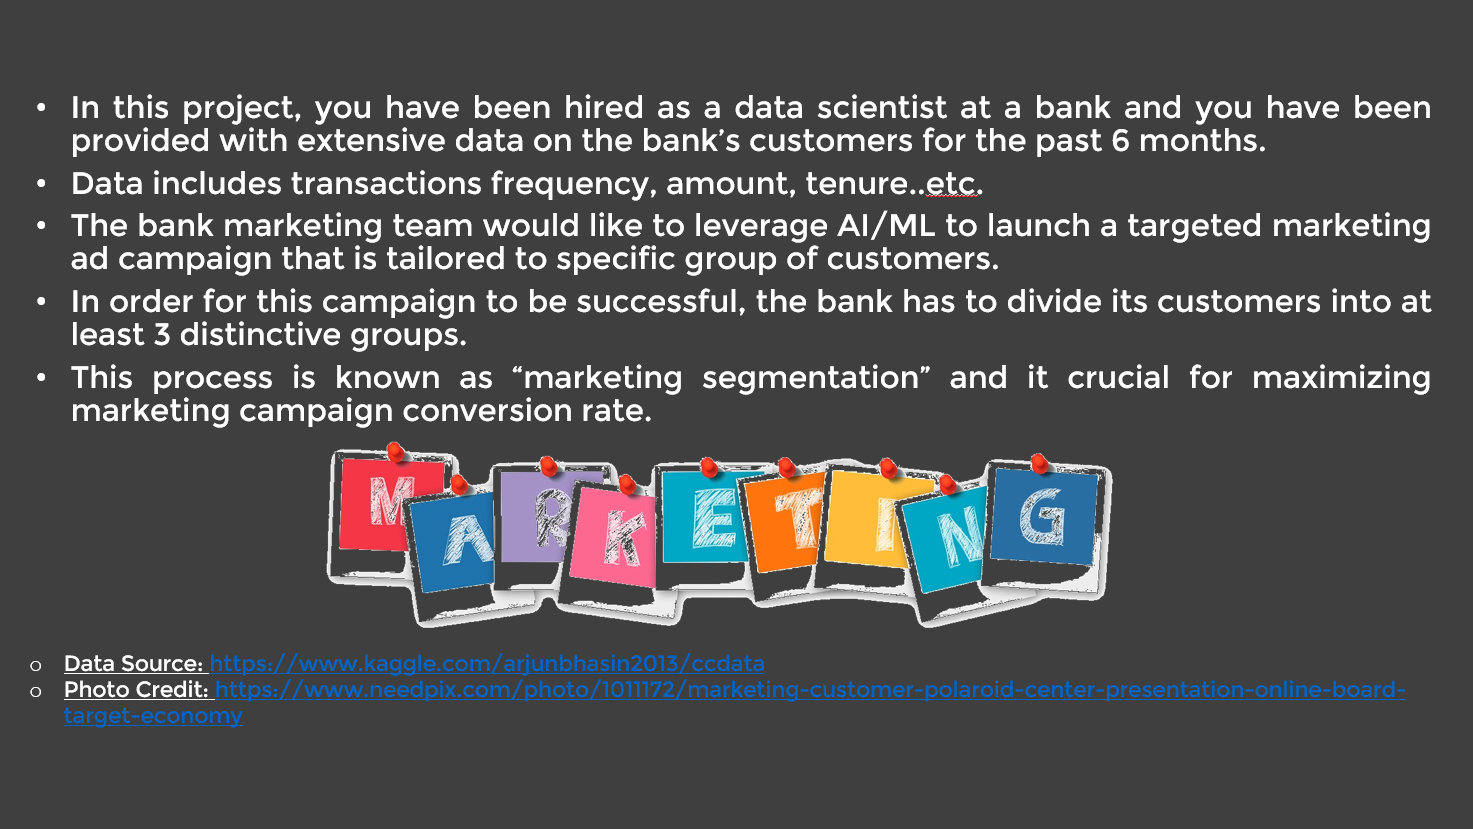

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

#  IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv("C:/Users/Parth Mehta/Downloads/marketing_data.csv")

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Summary of Dataset 

1) CUSTID: Identification of Credit Card holder

2) BALANCE: Balance amount left in customer's account to make purchases

3) BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4) PURCHASES: Amount of purchases made from account

5) ONEOFFPURCHASES: Maximum purchase amount done in one-go

6) INSTALLMENTS_PURCHASES: Amount of purchase done in installment

7) CASH_ADVANCE: Cash in advance given by the user

8) PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9) ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10) PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11) CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

12) CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

13) PURCHASES_TRX: Number of purchase transactions made

14) CREDIT_LIMIT: Limit of Credit Card for user

15) PAYMENTS: Amount of Payment done by user

16) MINIMUM_PAYMENTS: Minimum amount of payments made by user  

17) PRC_FULL_PAYMENT: Percent of full payment paid by user

18) TENURE: Tenure of credit card service for user

In [4]:
# Let's apply info and get additional insights on our dataframe
creditcard_df.info()
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()
# Let's apply describe() and get more statistical insights on our dataframe


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Insights

1) Mean balance is $1564 

2) Balance frequency is frequently updated on average ~0.9

3) Purchases average is $1000

4) one off purchase average is ~$600

5) Average purchases frequency is around 0.5

6) average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

7) Average credit limit ~ 4500

8) Percent of full payment is 15%

9) Average tenure is 11 years

- All the Features are on different scale , so **scaling** of this dataset is important before fitting the model.

#  Exploratory Data Analysis

<AxesSubplot:>

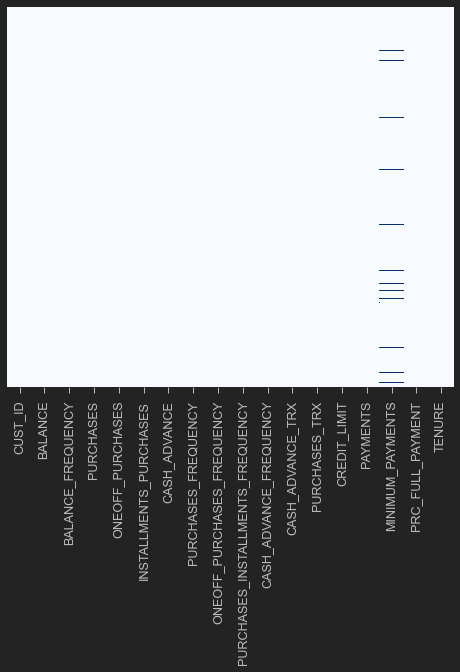

In [6]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [7]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0


- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [9]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

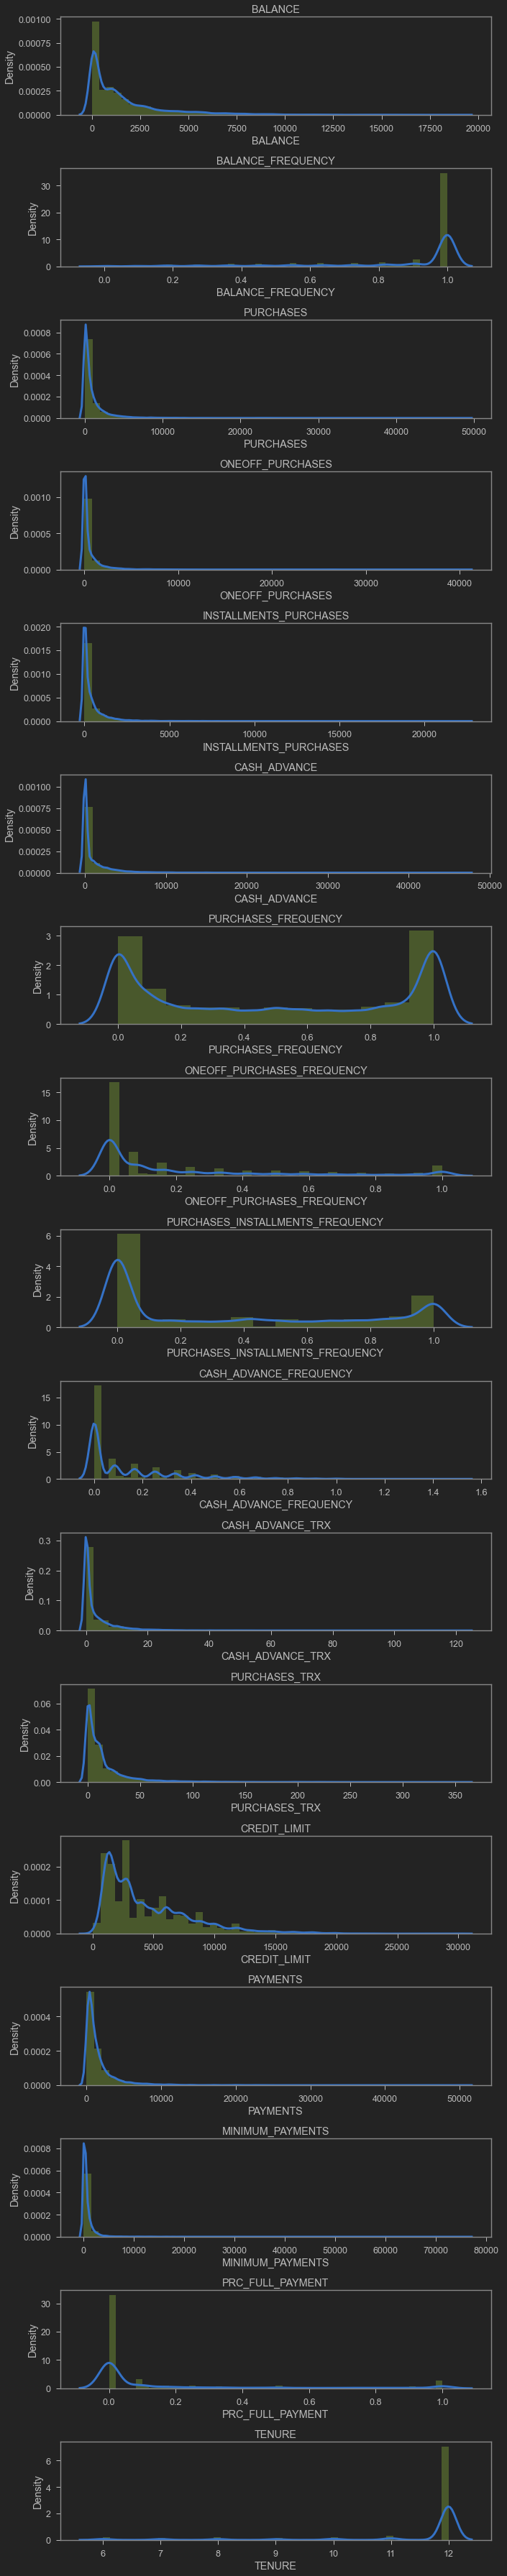

In [10]:

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE","bw":0.1}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

## Insights

1) Mean of balance is $1500

2) 'Balance_Frequency' for most customers is updated frequently ~1

3) For 'PURCHASES_FREQUENCY', there are two distinct group of customers

4) For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently      

5) Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

6) Credit limit average is around $4500

7)  Most customers are ~11 years tenure

8) Most of the Data is **Skewed** and we will have to perform some kind of log transformation on the dataset.

- Obtain the correlation matrix between features

<AxesSubplot:>

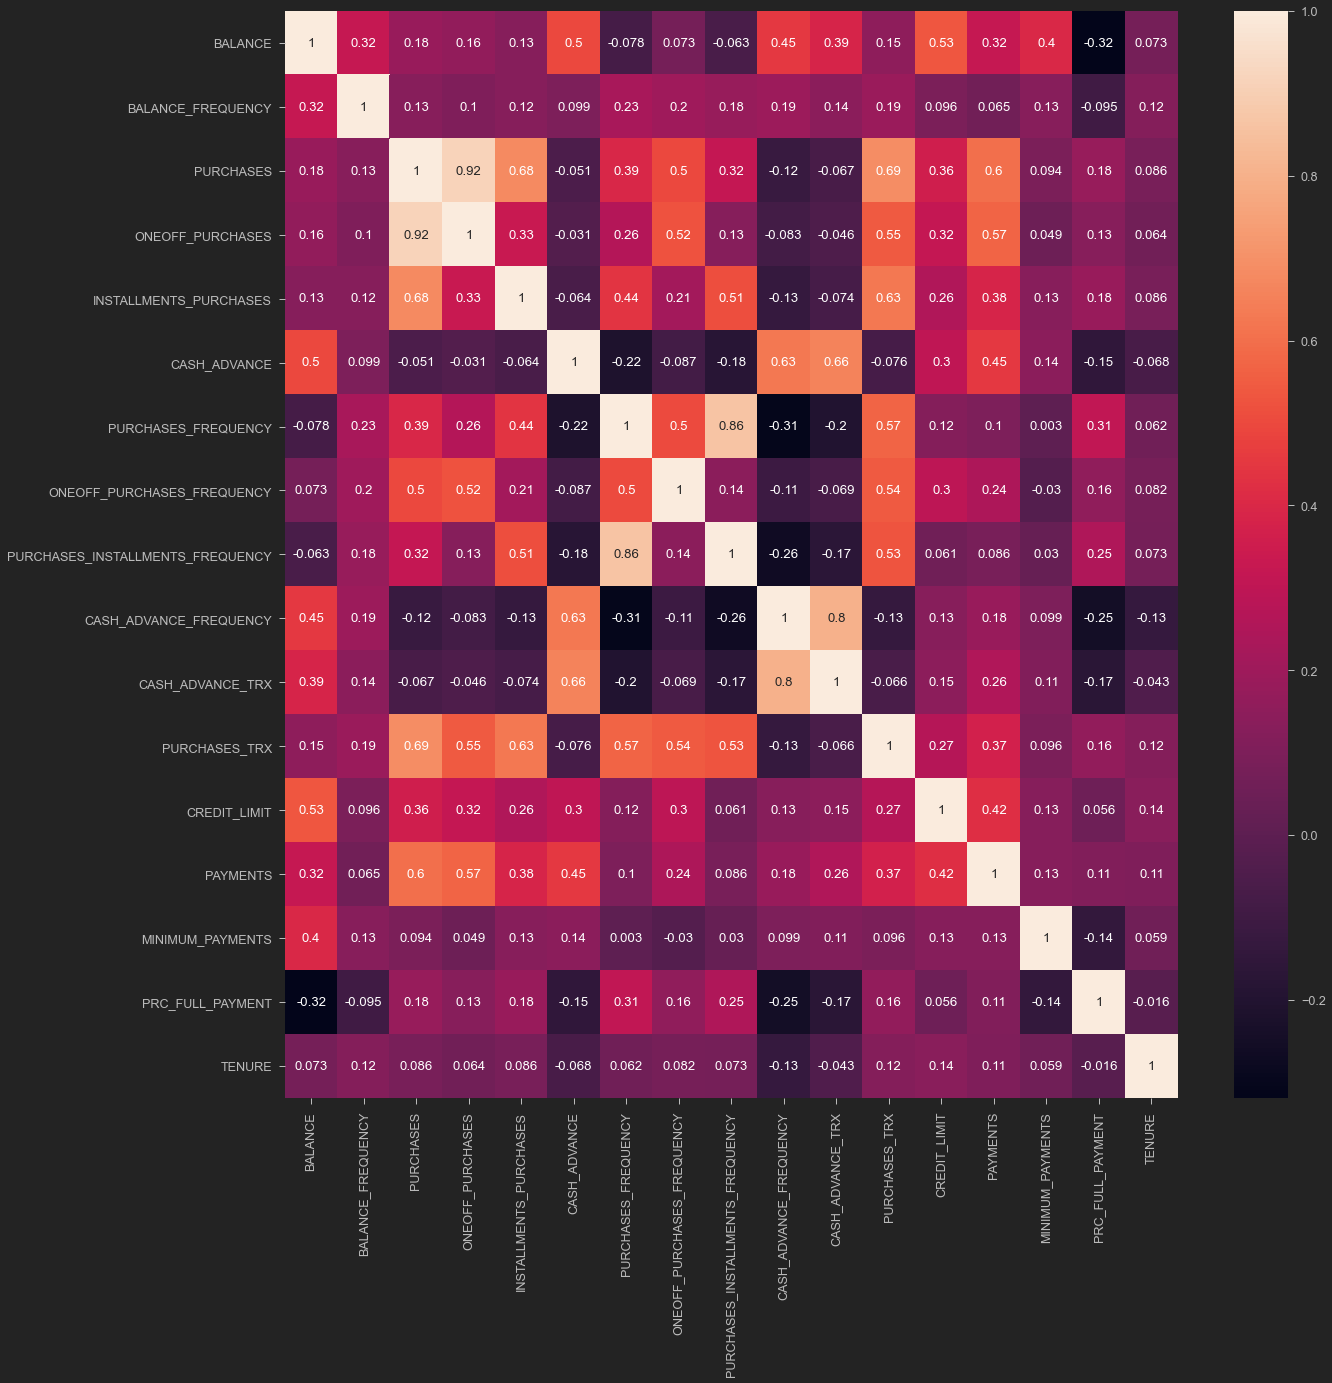

In [11]:
corr = creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True)

## Insights

1) Purchases is strongly correlated with oneoff and installments purchases.

2) Purchase frequency and purchace installments frequency are highly correlated .

3) Cash advance , cash advance frequency and cash advance trx are also highly correlated.

- Since there are many highly correlated and hence **redundant** features , performing **PCA** would be reccomended.

# Feature engineering

In [12]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [16]:
creditcard_df_scaled.shape

(8950, 17)

In [17]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# K Means 

Text(0, 0.5, 'Inertia')

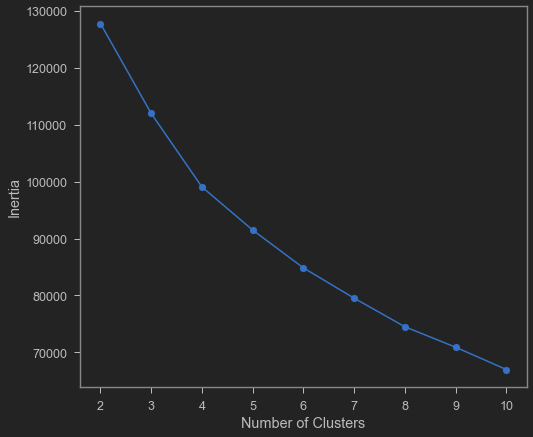

In [18]:
inertia = []
sil=[]
list_num_clusters = list(range(2,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(creditcard_df_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(creditcard_df_scaled,km.labels_))
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

**From The above plot we can't get a clear indication of our elbow point , so we'll use the silhouette_score method to find the optimal number of clusters**

Text(0, 0.5, 'Silhouette Coefficient')

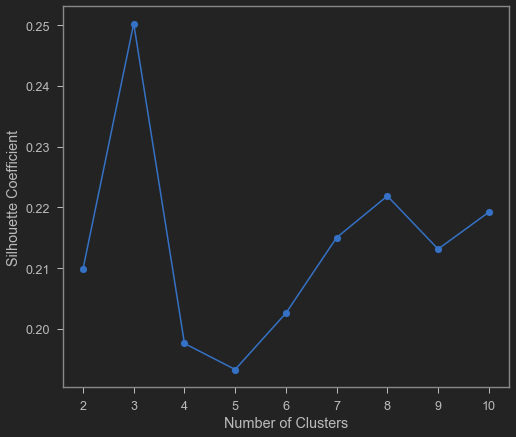

In [19]:
plt.plot(list_num_clusters,sil)
plt.scatter(list_num_clusters,sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

**We can use 7 clusters with KMeans and get a decent Silhouette Coefficient of 0.25**

#  APPLY K-MEANS METHOD WITH K = 7

In [20]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(7, 17)

In [22]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701894,-2.135494,-0.307095,-0.230581,-0.302387,-0.322957,-0.547410,-0.428870,-0.441051,-0.522120,-0.376732,-0.416657,-0.172121,-0.201648,-0.257506,0.295702,0.201907
1,-0.371820,0.330649,-0.040290,-0.232338,0.331407,-0.368950,0.979614,-0.351949,1.170957,-0.478790,-0.363306,0.169731,-0.279209,-0.223022,-0.029676,0.306365,0.252315
2,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
3,0.005145,0.401903,-0.342469,-0.223187,-0.399620,-0.105638,-0.809573,-0.334207,-0.753292,0.082768,-0.042752,-0.464208,-0.301170,-0.248089,-0.016472,-0.452268,0.272336
4,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
5,0.138231,0.430969,0.948897,0.899563,0.590982,-0.306740,1.098287,1.873293,0.543382,-0.406920,-0.316550,1.216544,0.710215,0.396575,-0.031807,0.461244,0.307474
6,1.665714,0.393088,-0.206065,-0.150380,-0.211047,1.985393,-0.455942,-0.192320,-0.403527,1.902788,1.913216,-0.244230,1.007360,0.829578,0.550347,-0.391442,0.069439


In [23]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
1,790.563674,0.955598,917.123589,206.804463,710.755298,205.166488,0.883517,0.097465,0.829806,0.039334,0.769531,18.928711,3478.574317,1087.515582,795.048601,0.243321,11.854980
2,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
3,1575.183495,0.972478,271.514585,221.992526,49.696189,757.344198,0.165430,0.102757,0.065060,0.151707,2.957072,3.171358,3398.668778,1014.951710,825.819863,0.021434,11.881773
4,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
5,1852.191134,0.979363,3030.538347,2085.527468,945.485562,335.623230,0.931146,0.761297,0.580391,0.053715,1.088608,44.948576,7078.502589,2881.188655,790.082447,0.288621,11.928797
6,5031.518273,0.970390,562.944521,342.837294,220.220445,5142.332487,0.307359,0.145085,0.204065,0.515911,16.305122,8.639198,8159.637578,4134.689531,2146.767772,0.039224,11.610245


In [24]:
labels.shape # Labels associated to each data point

(8950,)

In [25]:
labels.max()

6

In [26]:
labels.min()

0

In [27]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([4, 5, 1, ..., 2, 2, 2])

In [28]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


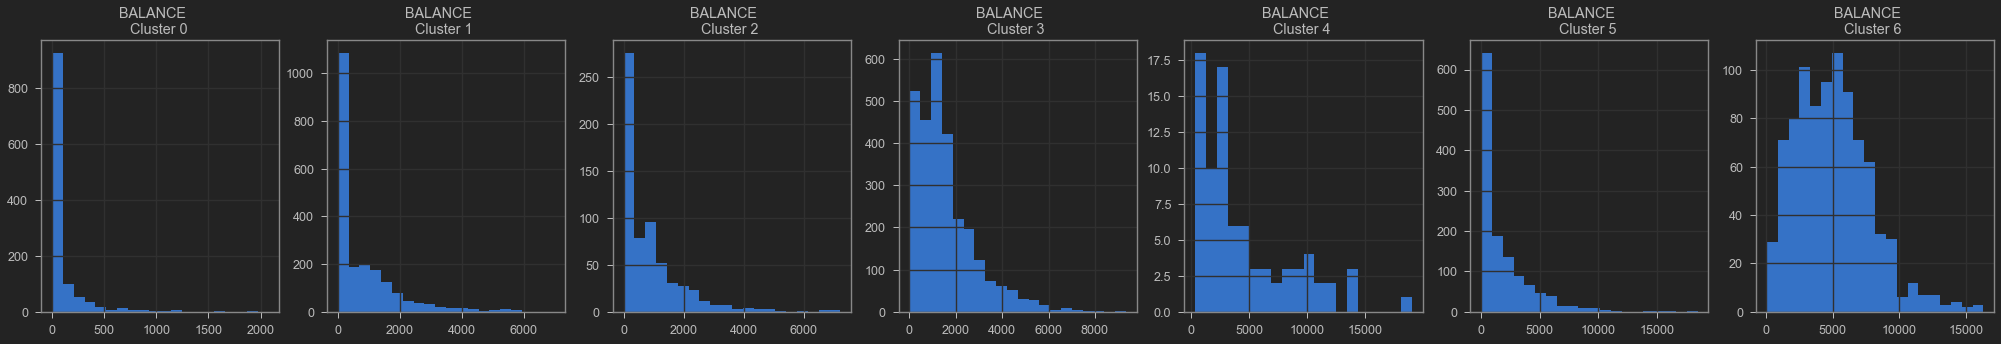

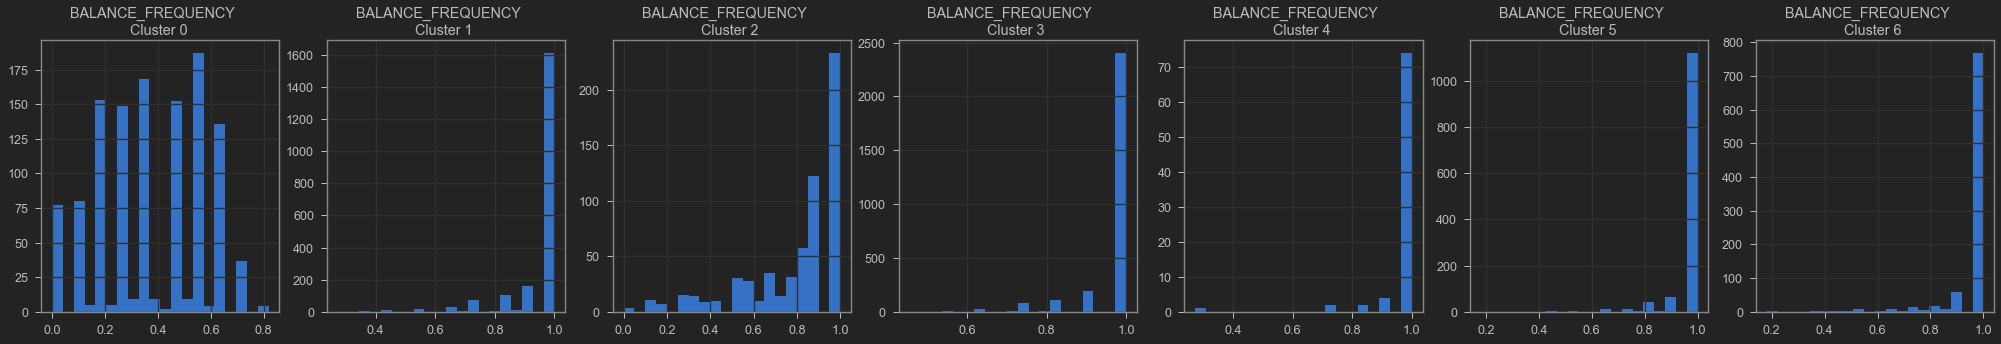

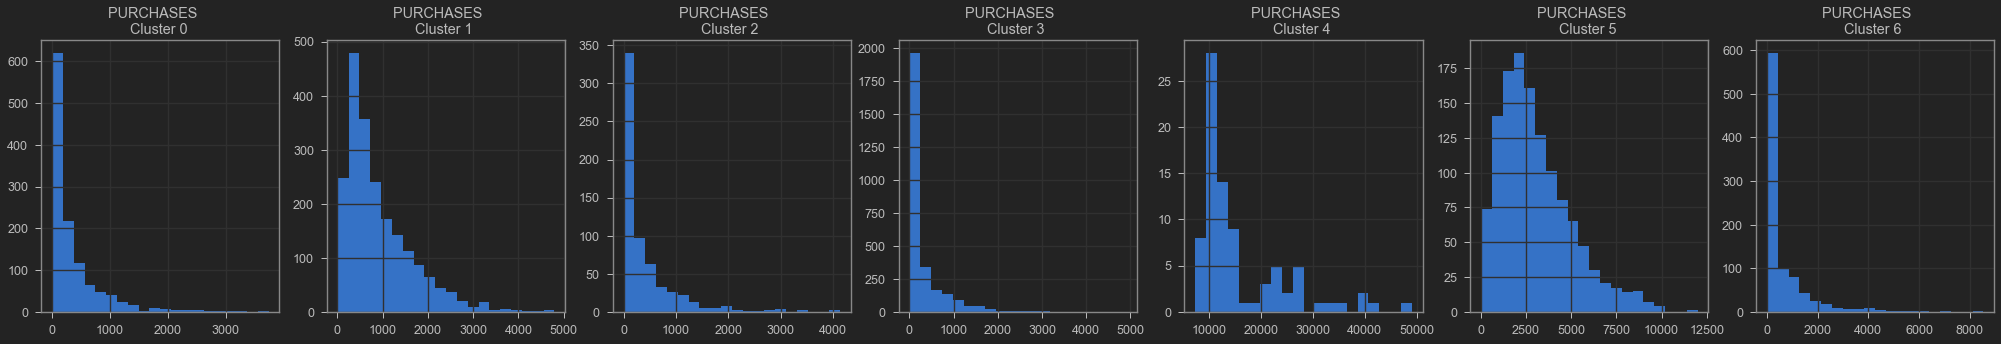

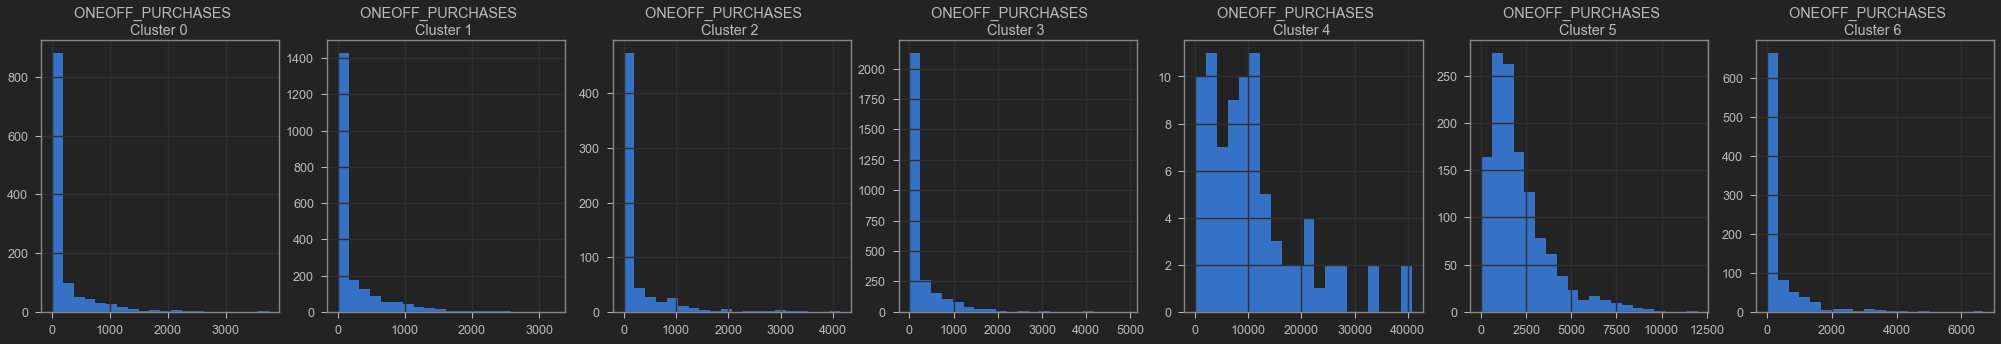

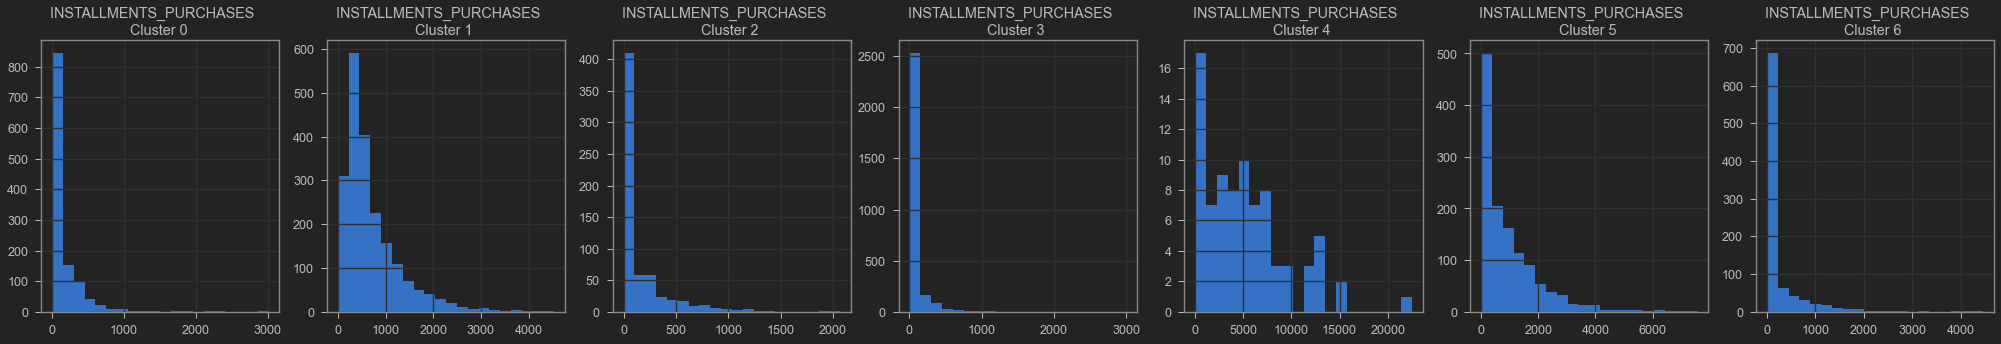

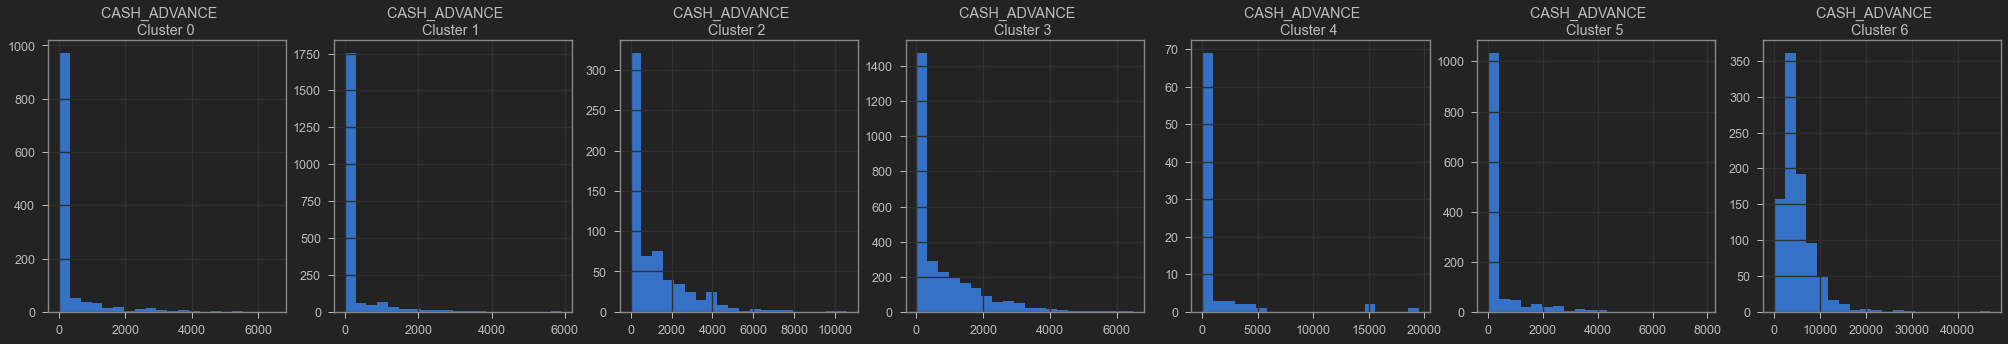

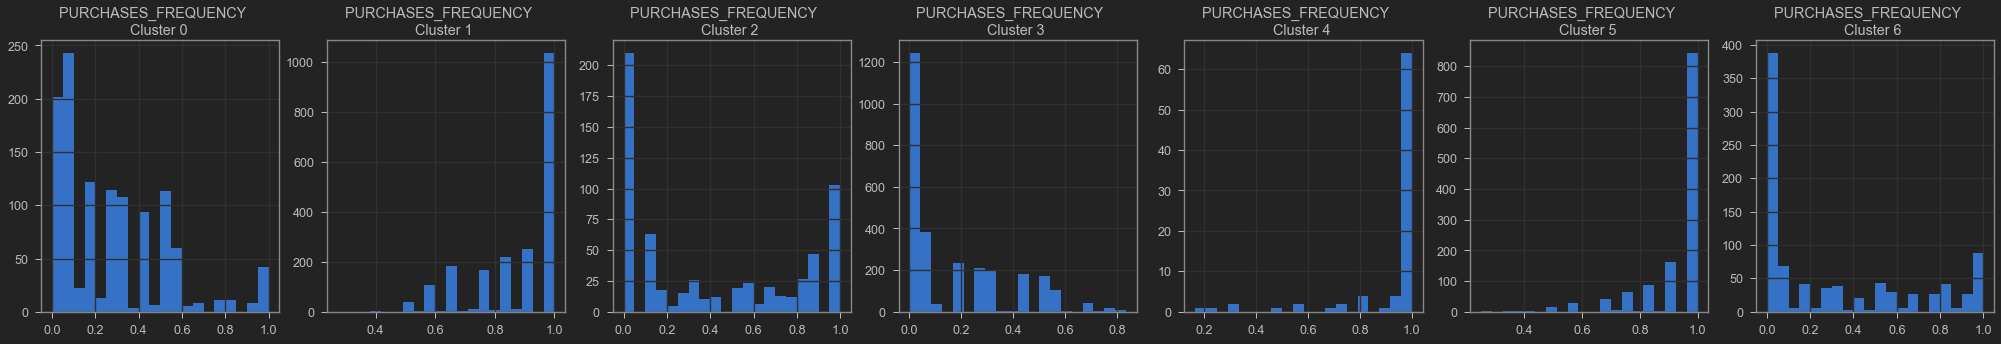

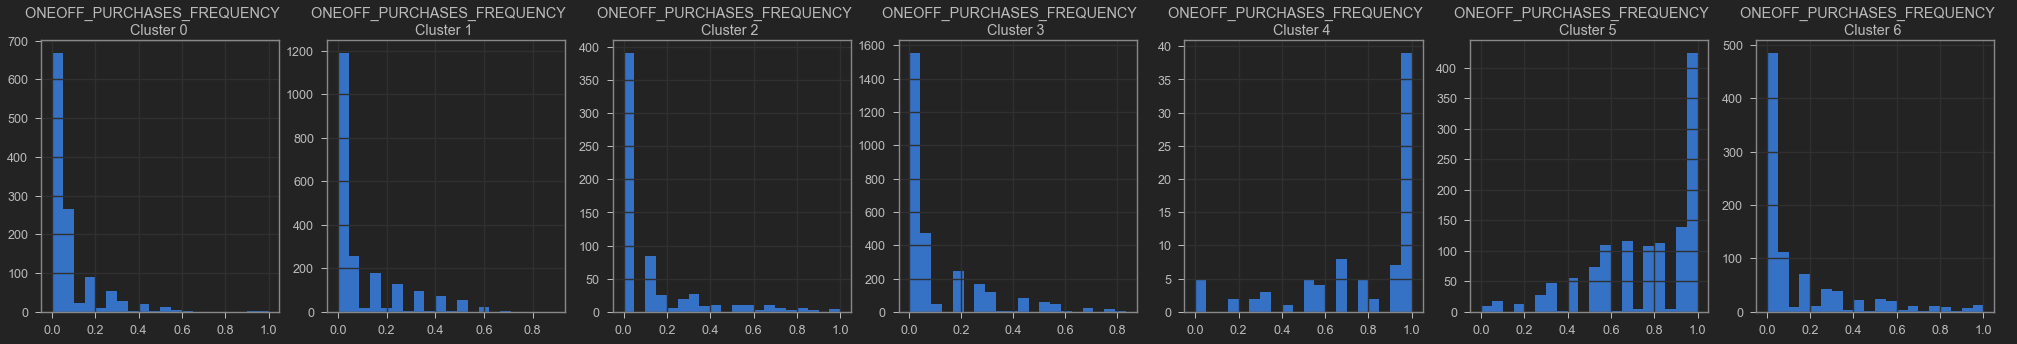

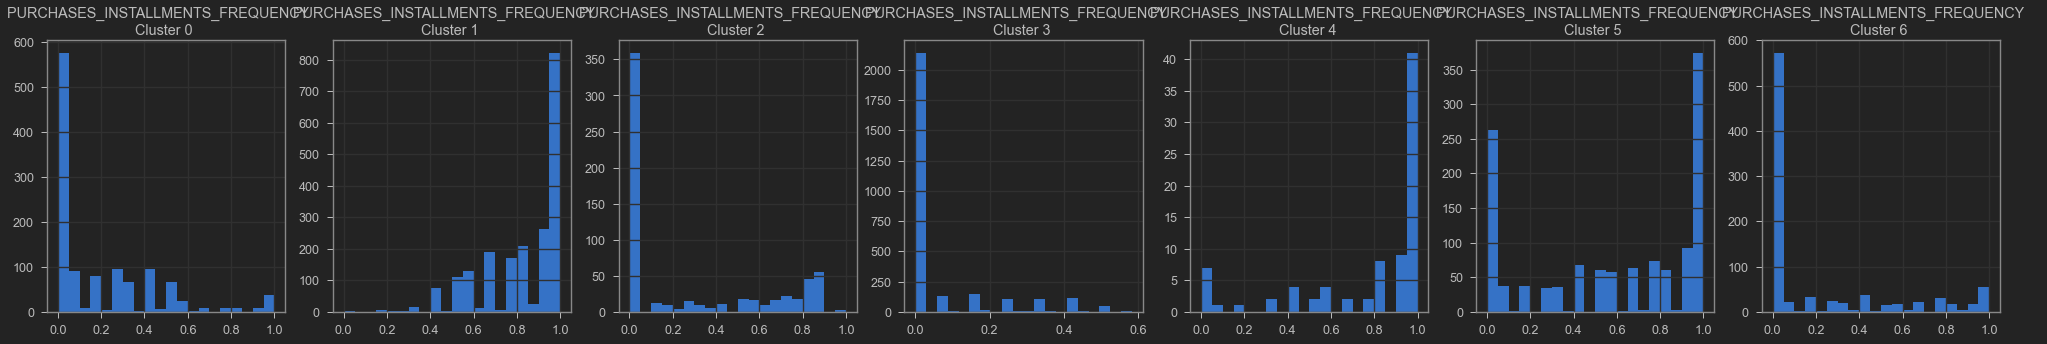

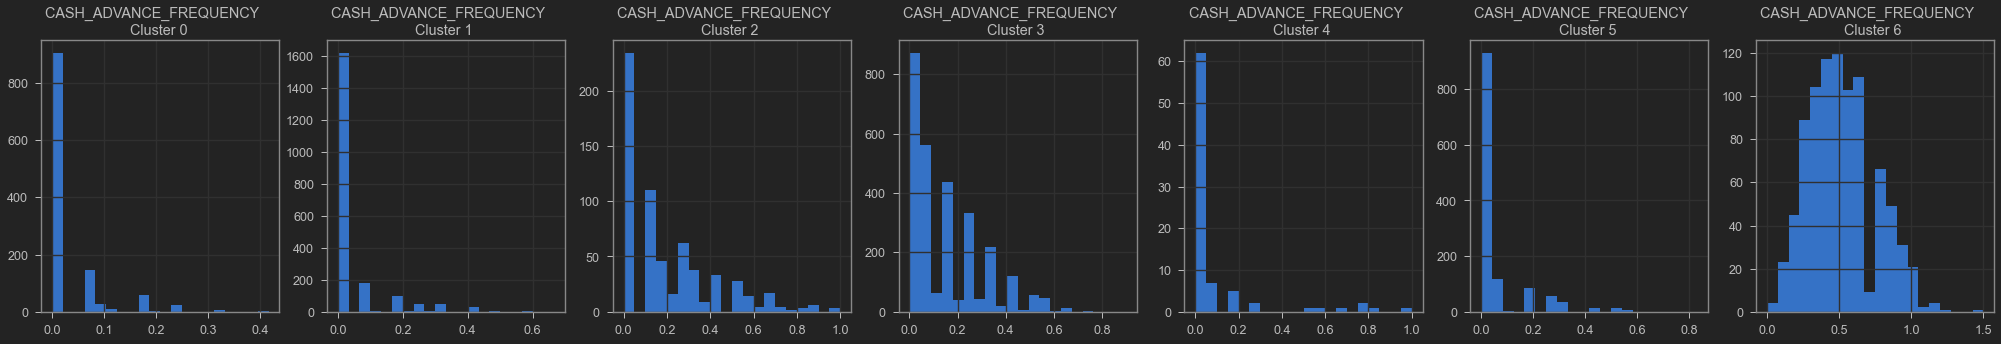

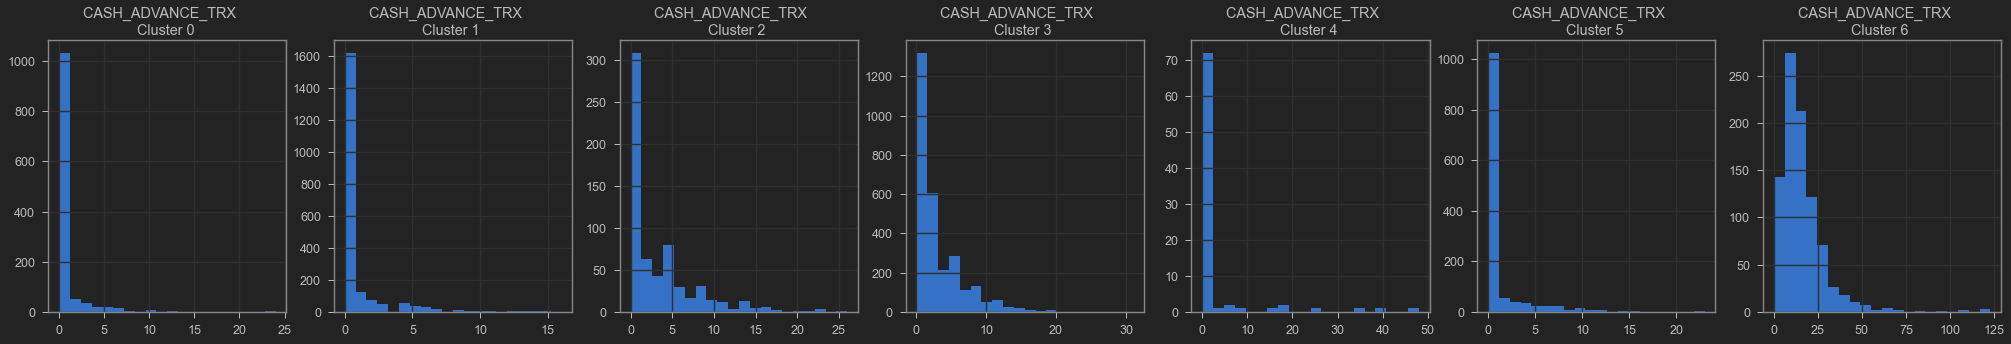

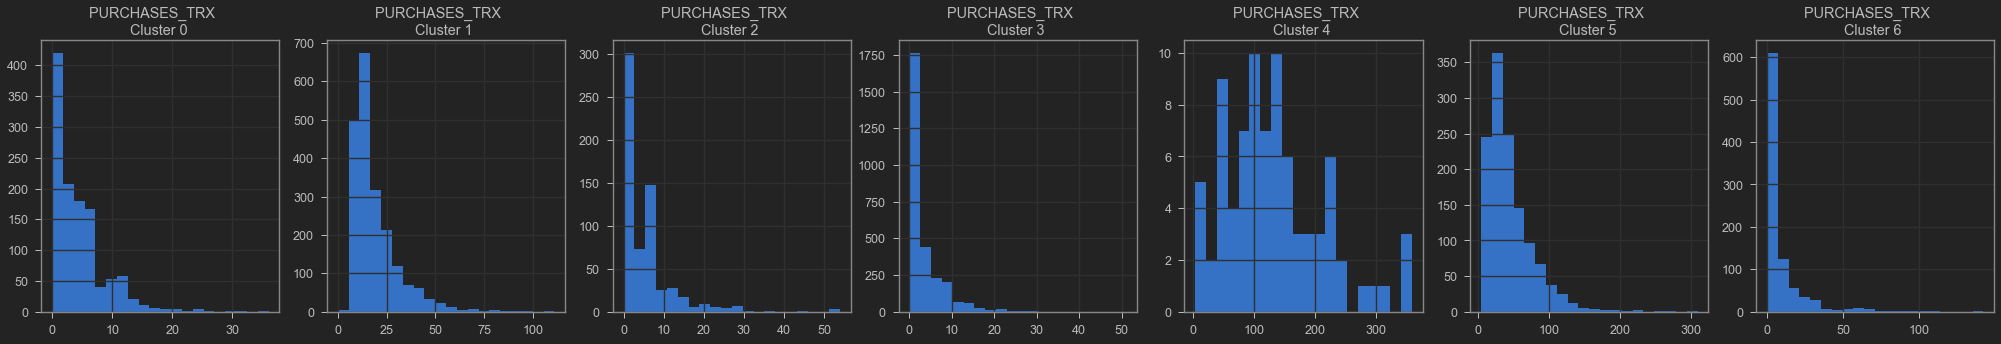

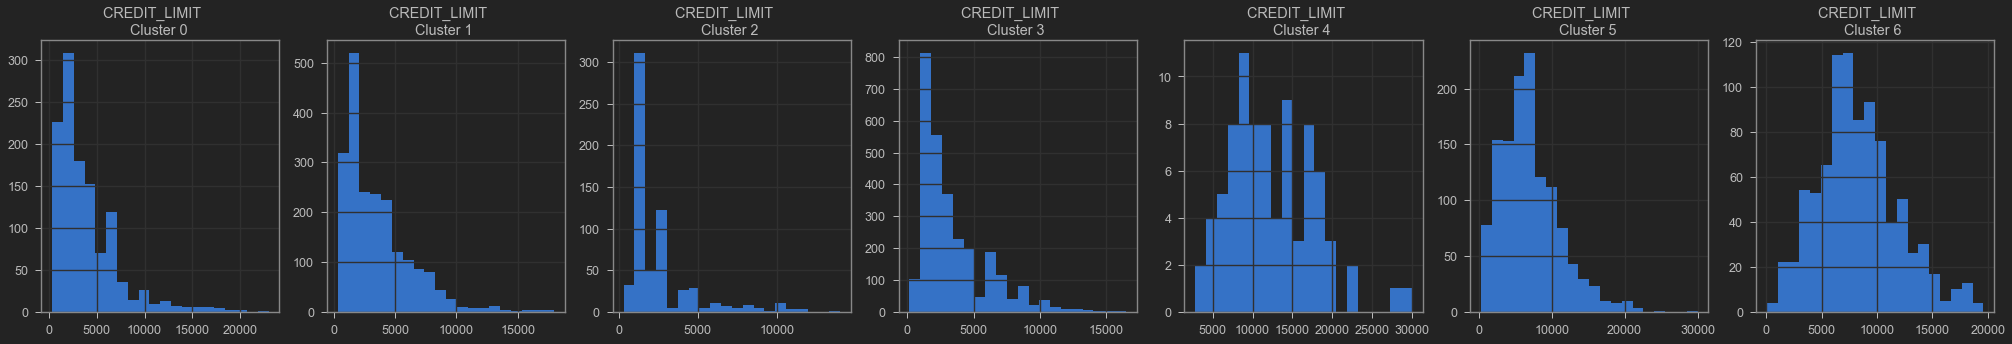

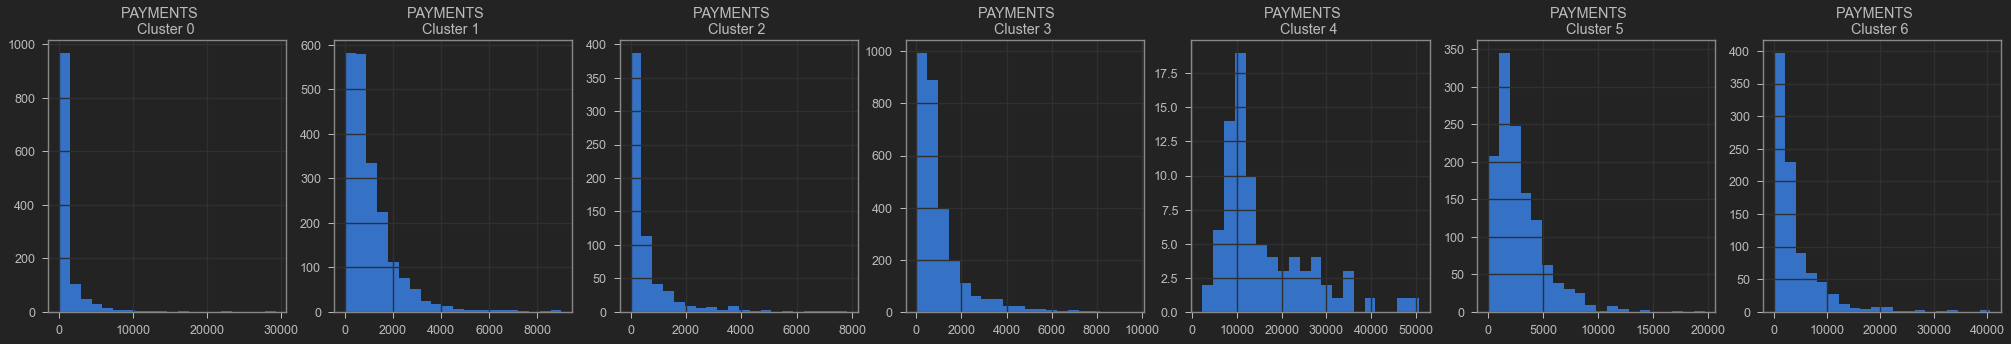

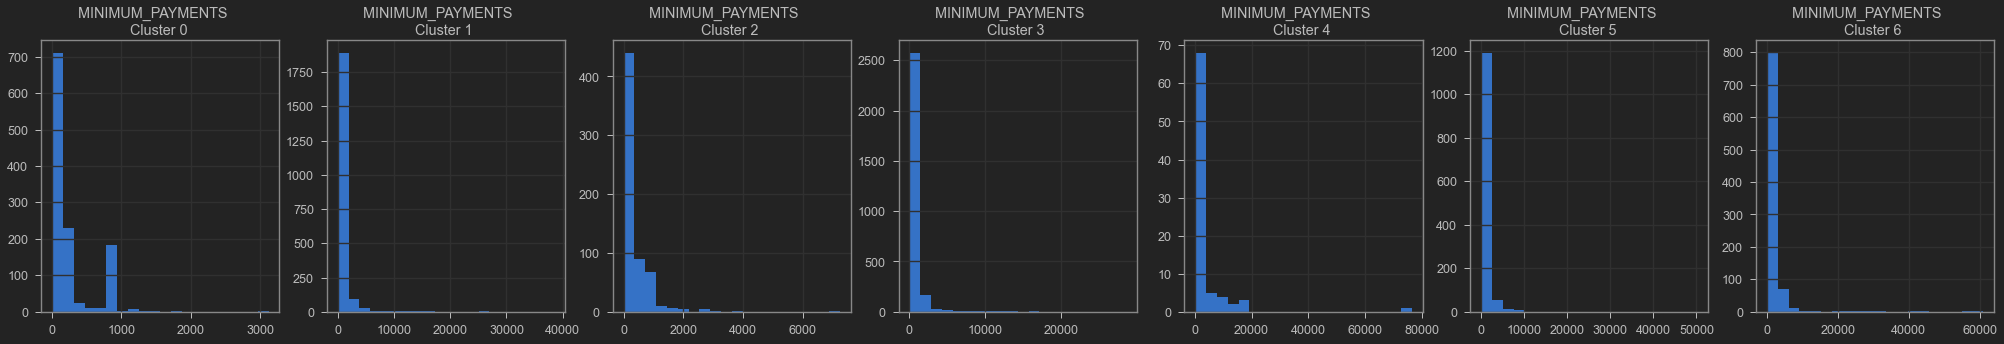

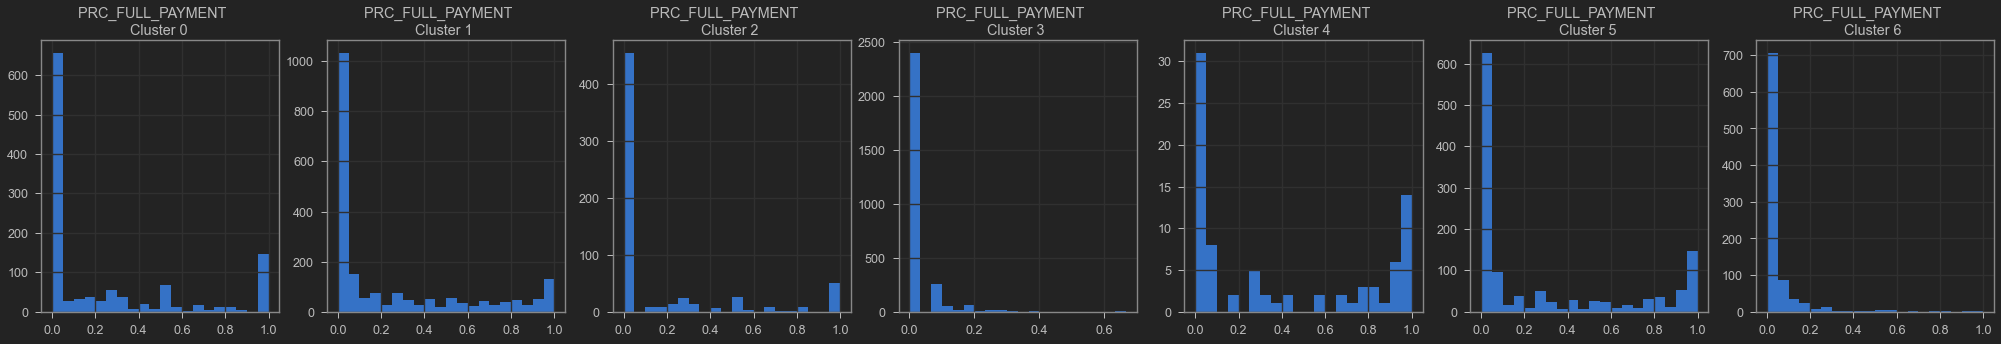

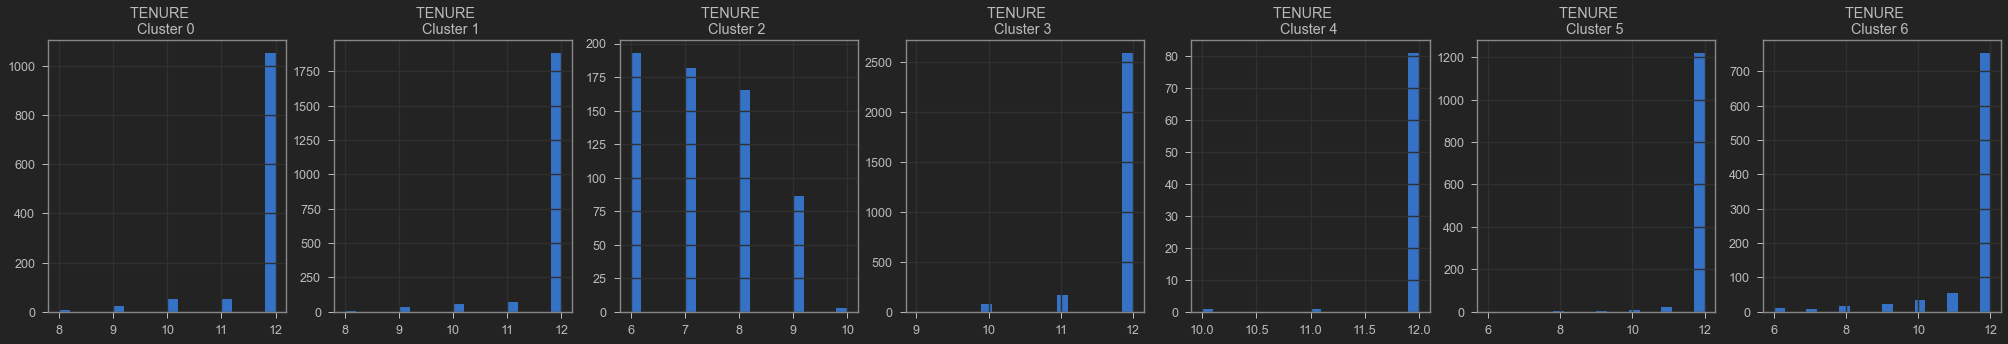

In [29]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# APPLY PCA AND VISUALIZE THE RESULTS

In [30]:
# Obtain the principal components 
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)

In [31]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076447
1,-1.138299,2.506505
2,0.969685,-0.383529
3,-0.873629,0.043174
4,-1.599434,-0.688579


In [32]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076447,3
1,-1.138299,2.506505,6
2,0.969685,-0.383529,5
3,-0.873629,0.043174,3
4,-1.599434,-0.688579,3


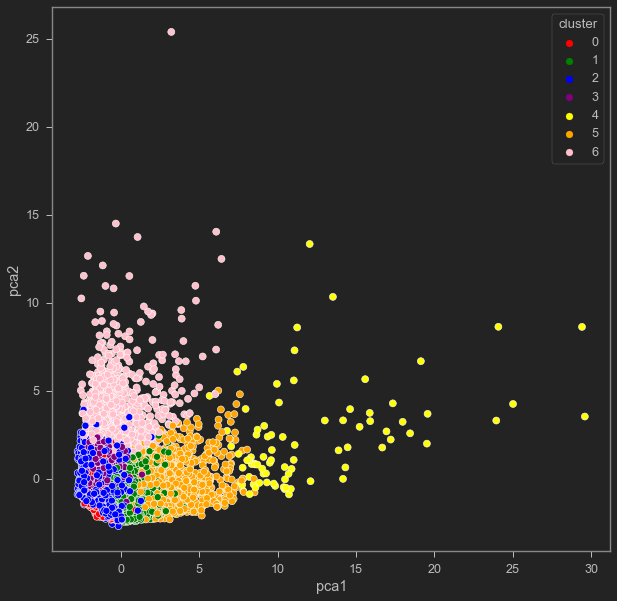

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','purple','yellow','orange','pink'])
plt.show()

# Hierarchial Clustering

In [34]:
list_num_clusters = list(range(2,11))
linkage=['complete','ward','single','average']
metrics=list()
for link in linkage:
    for num_clusters in list_num_clusters:
        ag = AgglomerativeClustering(n_clusters=num_clusters, linkage=link, compute_full_tree=True)
        labels=ag.fit_predict(creditcard_df_scaled)
        metrics.append(pd.Series({'n':num_clusters, 
                              'score':silhouette_score(creditcard_df_scaled,labels)}, 
                             name=link))

metrics = pd.concat(metrics, axis=1)

In [35]:
metrics.T.reset_index()

,index,n,score
0,complete,2.0,0.786555
1,complete,3.0,0.786309
2,complete,4.0,0.779261
3,complete,5.0,0.659927
4,complete,6.0,0.659815
5,complete,7.0,0.656997
6,complete,8.0,0.645827
7,complete,9.0,0.301083
8,complete,10.0,0.301055
9,ward,2.0,0.177545


**Let's Try the Single Linkage Clusters as they are giving the best scores**

In [36]:
ag=AgglomerativeClustering(n_clusters=5, linkage='single')
labels=ag.fit_predict(creditcard_df_scaled)

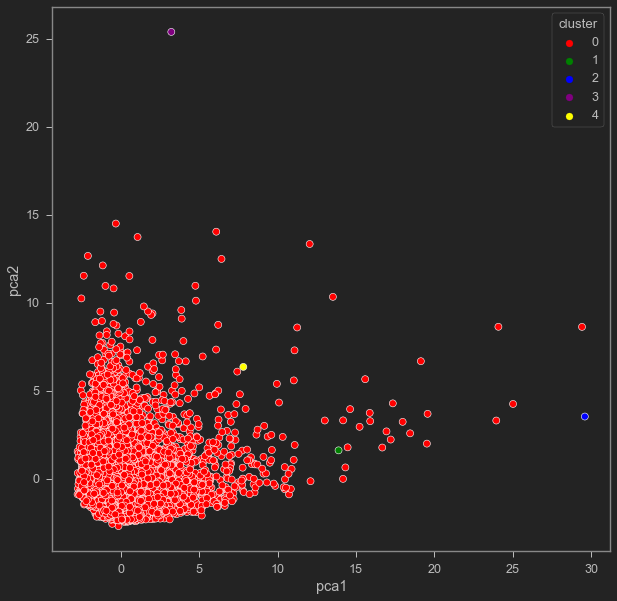

In [37]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','purple','yellow'])
plt.show()


**There are no clear clusters and this is not at all a good segmentation of the credit card data. Therefore, we will not use this clustering algorithm for this problem**

**Although the ward linkages will provide clear segmentations of the data , we will overlook those segmentations because of lower silhouette scores as compared to KMeans clustering algorithm**

# Inference

### Looking at the Seven clusters created by Kmeans I can infer that -


1) Second Customers cluster (Non-Users) - These are the type of customers who make the least use of their card in any purchase. They have the lowest purchase ratio in any category.

2) Fifth Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%

3) Fourth Customer cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

4) Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

5) Sixth customer cluster (low tenure): these are customers with low tenure (7 years), low balance.


# Suggestions

Try using a different clustering algorithm too like DBSCAN. Try removing the outliers of the data and then fitting the model.
We can also try to perform PCA before fitting the model . It might give a different and better result.